In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [2]:
# Assumant que vos données sont au format CSV
cancer_xtrain = pd.read_csv('cancer_xtrain.csv')
cancer_ytrain = pd.read_csv('cancer_ytrain.csv')
cancer_xtest = pd.read_csv('cancer_xtest.csv')
cancer_ytest = pd.read_csv('cancer_ytest.csv')

In [3]:
clf= DecisionTreeClassifier()

In [4]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
scores=[]
for i in range(2,50):
    clf= RandomForestClassifier(n_estimators=300, random_state=42)
# Réduisez les données à 2 composantes principales
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(cancer_xtrain)
    clf.fit(X_pca, cancer_ytrain)
    cancer_xtes=pca.transform(cancer_xtest)
    predicted = clf.predict(cancer_xtes)
    accuracy = accuracy_score(cancer_ytest, predicted)
    scores.append(accuracy)
    




c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarni

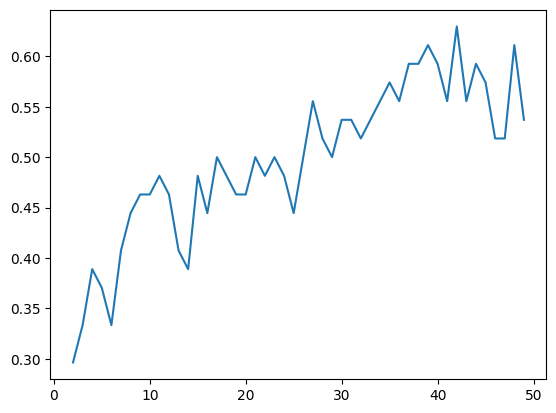

In [5]:
import matplotlib.pyplot as plt

plt.plot(range(2,50), scores)

# 1) Arbres de décision standard:

In [6]:
# Importation du classificateur d'arbre de décision
dt = DecisionTreeClassifier()

# Entraînement du modèle sur les données d'entraînement (cancer_xtrain pour les caractéristiques, cancer_ytrain pour les étiquettes)
dt.fit(cancer_xtrain, cancer_ytrain)

# Utilisation du modèle entraîné pour prédire les étiquettes des données de test
y_pred_dt = dt.predict(cancer_xtest)

# Calcul de l'exactitude du modèle en comparant les étiquettes prédites avec les vraies étiquettes des données de test
accuracy_dt = accuracy_score(cancer_ytest, y_pred_dt)

# Affichage de l'exactitude du modèle
print(f"Accuracy of Decision Tree: {accuracy_dt}")


Accuracy of Decision Tree: 0.5


##### 1.1 )  Lutte contre le surapprentissage (Overfitting)

     a). Élagage de l'arbre: Vous pouvez limiter la profondeur de l'arbre ou fixer un nombre minimum d'échantillons pour diviser un nœud.

In [7]:
# Création d'une instance d'un arbre de décision avec des paramètres de taille maximale de l'arbre (max_depth=22) et 
# du nombre minimum d'échantillons requis pour scinder un nœud interne (min_samples_split=26)
dt_pruned = DecisionTreeClassifier(max_depth=22, min_samples_split=26)

# Entraînement du modèle d'arbre de décision élagué sur les données d'entraînement 
# (cancer_xtrain pour les caractéristiques, cancer_ytrain pour les étiquettes)
dt_pruned.fit(cancer_xtrain, cancer_ytrain)

# Utilisation du modèle élagué pour prédire les étiquettes des données de test
y_pred_dt = dt_pruned.predict(cancer_xtest)

# Calcul de l'exactitude (accuracy) du modèle en comparant les étiquettes prédites avec les vraies étiquettes des données de test
accuracy_dt = accuracy_score(cancer_ytest, y_pred_dt)

# Affichage de l'exactitude du modèle élagué
print(f"Accuracy of Decision Tree: {accuracy_dt}")

Accuracy of Decision Tree: 0.5370370370370371


  b) . Validation croisée: Utilisez la validation croisée pour évaluer les performances du modèle sur différents sous-ensembles de données.

In [8]:
from sklearn.model_selection import cross_val_score

# Initialisation de l'arbre de décision
dt = DecisionTreeClassifier()

# Exécution de la validation croisée
scores = cross_val_score(dt, cancer_xtrain, cancer_ytrain, cv=5)

# Affichage des résultats
print("Scores de chaque fold:", scores)
print("Précision moyenne: %0.2f" % (scores.mean()))
print("Intervalle de confiance à 95%%: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Scores de chaque fold: [0.44827586 0.51724138 0.62068966 0.5862069  0.5       ]
Précision moyenne: 0.53
Intervalle de confiance à 95%: 0.53 (+/- 0.12)


In [9]:
from sklearn.model_selection import KFold

# Création d'un objet KFold pour la validation croisée. 
# 'n_splits=5' indique que les données seront divisées en 5 ensembles. 
# 'shuffle=True' mélange les données avant de les diviser, ce qui est bon pour la randomisation.
# 'random_state=42' garantit que les divisions des données sont reproductibles à chaque exécution.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcul des scores de performance du modèle d'arbre de décision 'dt' en utilisant la validation croisée.
# 'cancer_xtrain' et 'cancer_ytrain' sont les données d'entraînement et leurs étiquettes respectives.
# 'cv=kf' spécifie que l'objet KFold créé ci-dessus sera utilisé pour la validation croisée.
scores = cross_val_score(dt, cancer_xtrain, cancer_ytrain, cv=kf)

# Affichage des résultats
print("Scores de chaque fold:", scores)
print("Précision moyenne: %0.2f" % (scores.mean()))
print("Intervalle de confiance à 95%%: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Scores de chaque fold: [0.44827586 0.37931034 0.65517241 0.55172414 0.46428571]
Précision moyenne: 0.50
Intervalle de confiance à 95%: 0.50 (+/- 0.19)


In [10]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt, cancer_xtrain, cancer_ytrain, cv=skf)
# Affichage des résultats
print("Scores de chaque fold:", scores)
print("Précision moyenne: %0.2f" % (scores.mean()))
print("Intervalle de confiance à 95%%: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores de chaque fold: [0.65517241 0.48275862 0.55172414 0.62068966 0.42857143]
Précision moyenne: 0.55
Intervalle de confiance à 95%: 0.55 (+/- 0.17)


#### 1.2) Optimisation des hyperparamètres

In [11]:
from sklearn.model_selection import GridSearchCV
# Définition des paramètres à tester. 'max_depth' avec des valeurs [3, 5], 'min_samples_split' avec [2, 5], 
# et 'min_samples_leaf' avec [1, 2]. Ces paramètres définissent respectivement la profondeur maximale de l'arbre, 
# le nombre minimum d'échantillons requis pour scinder un nœud, et le nombre minimum d'échantillons requis dans un nœud feuille.
parameters = {'max_depth':[3, 5], 'min_samples_split':[2, 5], 'min_samples_leaf': [1, 2]}

# Création d'un objet GridSearchCV avec le classificateur d'arbre de décision, les paramètres à tester, 
# et le nombre de plis (cv=5) pour la validation croisée.
grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

# Entraînement du GridSearchCV sur les données d'entraînement. Cette étape teste toutes les combinaisons 
# possibles de paramètres et utilise la validation croisée pour évaluer chaque combinaison.
grid_search.fit(cancer_xtrain, cancer_ytrain)

# Après l'entraînement, extraction des meilleurs paramètres trouvés par la recherche sur grille.
best_parameters = grid_search.best_params_


In [12]:
best_parameters

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

 # 2) random forests

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Création d'une instance du classificateur de forêt aléatoire avec 100 arbres (n_estimators=100) 
# et un état aléatoire fixe pour la reproductibilité des résultats (random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle de forêt aléatoire sur les données d'entraînement (cancer_xtrain pour les caractéristiques, 
# cancer_ytrain pour les étiquettes)
rf.fit(cancer_xtrain, cancer_ytrain)

# Utilisation du modèle entraîné pour prédire les étiquettes sur l'ensemble de test (cancer_xtest)
y_pred = rf.predict(cancer_xtest)

# Calcul de l'exactitude (accuracy) du modèle en comparant les étiquettes prédites (y_pred) 
# avec les véritables étiquettes de l'ensemble de test (cancer_ytest)
accuracy = accuracy_score(cancer_ytest, y_pred)

# Affichage de l'exactitude du modèle
print(f"Accuracy: {accuracy}")

c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5925925925925926


<Axes: >

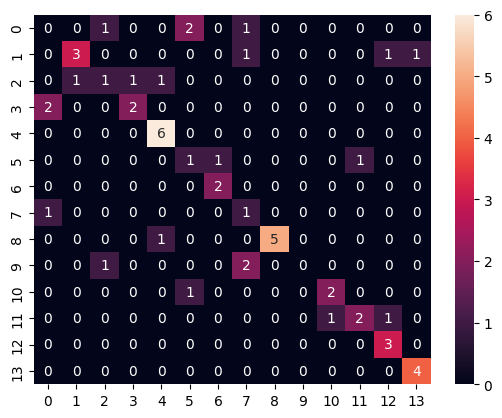

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(cancer_ytest, y_pred)

# Utilisation de Seaborn pour créer une carte de chaleur (heatmap) de la matrice de confusion. 
# 'annot=True' permet d'afficher les nombres dans les cases de la matrice, et 'fmt='g'' formate ces nombres.
sns.heatmap(cm, annot=True, fmt='g')

#### 2.1) Lutte contre le surapprentissage (Overfitting)

In [15]:
# Initialisation du RandomForestClassifier avec des paramètres spécifiés
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, 
                            oob_score=True, bootstrap=True, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf.fit(cancer_xtrain, cancer_ytrain)

# Affichage du score OOB, qui estime la performance du modèle sur des échantillons non utilisés pendant l'entraînement
print("OOB Score:", rf.oob_score_)

c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


OOB Score: 0.5486111111111112


 #### 2.2) Optimisation des hyperparamètres :

In [16]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres pour la recherche : 'n_estimators' (nombre d'arbres) et 'max_depth' (profondeur maximale de chaque arbre)
param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10]}

# Initialisation de GridSearchCV avec un RandomForestClassifier, la grille de paramètres et un nombre de plis 'cv=5' pour la validation croisée
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Entraînement de GridSearchCV sur les données d'entraînement
grid_search.fit(cancer_xtrain, cancer_ytrain)

# Récupération du meilleur estimateur (meilleure combinaison de paramètres) trouvé par GridSearchCV
best_rf = grid_search.best_estimator_


c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarni

In [17]:
# Utilisation du meilleur modèle trouvé par GridSearchCV pour faire des prédictions sur l'ensemble de test
final_pred = best_rf.predict(cancer_xtest)

# Calcul de l'exactitude en comparant les prédictions avec les étiquettes réelles de l'ensemble de test
final_accuracy = accuracy_score(cancer_ytest, final_pred)

# Affichage de l'exactitude finale du modèle
print(f"Final Accuracy: {final_accuracy}")

Final Accuracy: 0.6296296296296297


# 3) Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialisation du GradientBoostingClassifier avec 20 estimateurs, un taux d'apprentissage de 0.1 et un état aléatoire fixe
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, random_state=42)

# Entraînement du modèle sur les données d'entraînement
gb.fit(cancer_xtrain, cancer_ytrain)


c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=20, random_state=42)

In [19]:
# Prédiction des étiquettes pour l'ensemble de test avec le modèle Gradient Boosting
y_pred = gb.predict(cancer_xtest)

# Calcul de l'exactitude en comparant les prédictions avec les véritables étiquettes de l'ensemble de test
accuracy = accuracy_score(cancer_ytest, y_pred)

# Affichage de l'exactitude du modèle
print(f"Accuracy: {accuracy}")


Accuracy: 0.5


<Axes: >

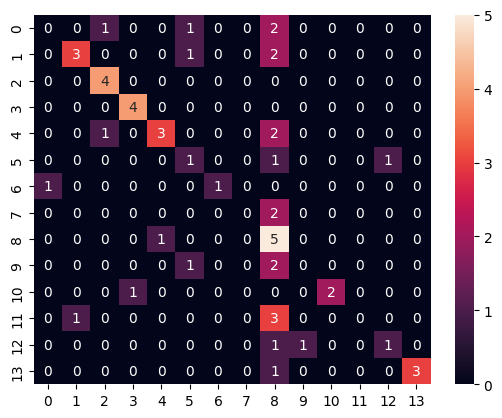

In [20]:
# Création d'une matrice de confusion pour comparer les vraies étiquettes et les prédictions
cm = confusion_matrix(cancer_ytest, y_pred)

# Affichage de la matrice de confusion sous forme de heatmap avec des annotations
sns.heatmap(cm, annot=True, fmt='g')

# 4)  XGBoost

In [21]:
import xgboost as xgb
import numpy as np

# Conversion des données d'entraînement en un format DMatrix, optimisé pour XGBoost
dtrain = xgb.DMatrix(cancer_xtrain, label=cancer_ytrain)

# Définition des paramètres du modèle, y compris la profondeur maximale, le taux d'apprentissage (eta) 
# et l'objectif (classification multi-classes avec probabilités souples)
param = {'max_depth': 3, 'eta': 0.3, 'objective': 'multi:softprob', 'num_class': 14}

# Entraînement du modèle avec les paramètres définis et 100 rondes de boosting
bst = xgb.train(param, dtrain, num_boost_round=100)

# Préparation des données de test pour la prédiction
dtest = xgb.DMatrix(cancer_xtest)

# Prédiction sur l'ensemble de test
y_pred = bst.predict(dtest)

# Conversion des prédictions en étiquettes de classe spécifiques
best_preds = np.asarray([np.argmax(line) for line in y_pred])

# Calcul de l'exactitude en comparant les prédictions aux véritables étiquettes
accuracy = accuracy_score(cancer_ytest, best_preds)

# Affichage de l'exactitude
print(f"Accuracy: {accuracy}")


Accuracy: 0.5185185185185185


In [22]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Définition de la grille de paramètres pour la recherche sur grille
param_grid = {
    'n_estimators': [10, 20],          # Nombre d'arbres de boosting
    'learning_rate': [0.001],          # Taux d'apprentissage
    'max_depth': [3, 5],               # Profondeur maximale de chaque arbre
    'min_child_weight': [1, 2],        # Poids minimum des enfants requis pour un split
    'gamma': [0, 0.1]                  # Paramètre de régularisation gamma
}

# Initialisation et exécution de la recherche sur grille avec le classificateur XGBoost
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(cancer_xtrain, cancer_ytrain)

# Récupération du meilleur modèle trouvé par la recherche sur grille
best_xgb = grid_search.best_estimator_

# Utilisation du meilleur modèle pour faire des prédictions sur l'ensemble de test
final_pred = best_xgb.predict(cancer_xtest)

# Calcul de l'exactitude du meilleur modèle
final_accuracy = accuracy_score(cancer_ytest, final_pred)

# Affichage de l'exactitude finale
print(f"Final Accuracy: {final_accuracy}")


Final Accuracy: 0.37037037037037035


# Conclusion



D'après les résultats de cette étude qui a examiné plusieurs modèles basés sur les arbres de décision, il ressort que la méthode la plus efficace pour élaborer un tel modèle consiste à appliquer d'abord une Analyse en Composantes Principales (ACP), suivie par la création d'un modèle d'arbre de décision.